In [1]:
%pip install opencv-python numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

Note: using train dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
test dataset using https://arxiv.org/abs/2307.02848

In [3]:
import os
import sys

module_path = os.path.abspath(".")

# if module_path not in sys.path:
sys.path.append(module_path)

from dataset import *
from segmentation import *

In [4]:
x_normal, x_tb = get_dataset()
x_normal_test, x_tb_test = get_dataset_test()
# x_tb=x_tb[x_tb != None]

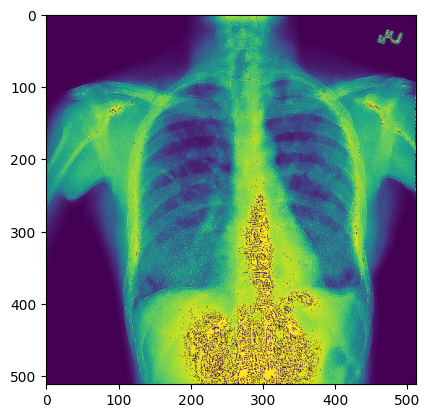

In [5]:
pyplot.imshow(x_normal[0])

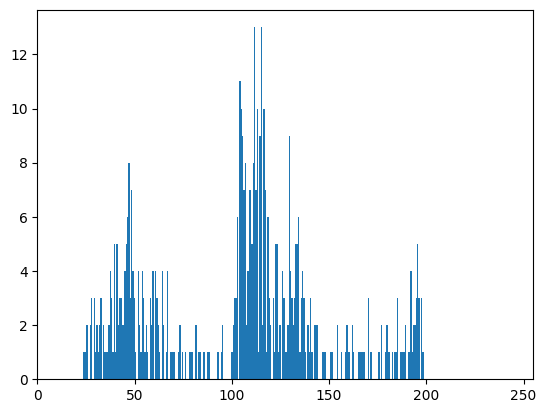

In [6]:
vals = x_normal[0].mean(axis=0).flatten()
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

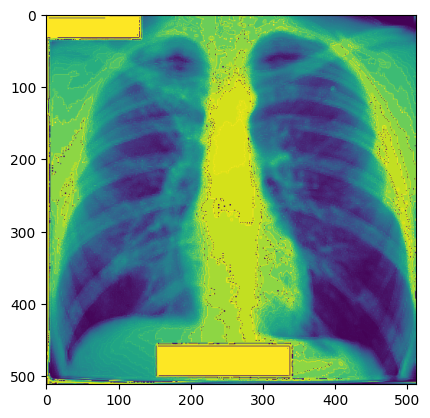

In [7]:
pyplot.imshow(x_tb[0])

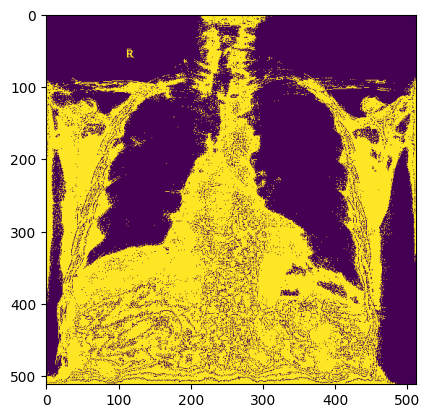

In [11]:
pyplot.imshow(get_segmentation(x_tb_test[0]))

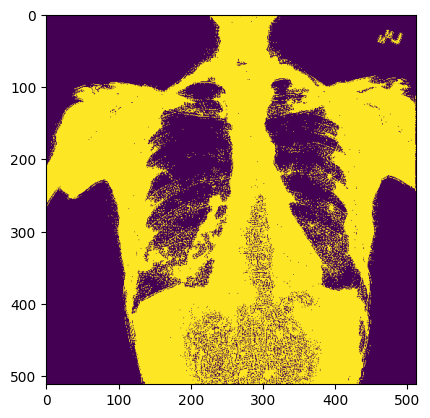

In [12]:
pyplot.imshow(get_segmentation(x_normal[0]))

In [13]:
np.array(x_tb).shape

(700, 512, 512)

In [15]:
x=[get_segmentation(x) for x in x_normal[:]]
y=["normal"]*len(x_normal[:])
x=x+[get_segmentation(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

x_test=[get_segmentation(x_test) for x_test in x_normal_test]
y_test=["normal"]*len(x_normal_test)
x_test=x_test+[get_segmentation(x_test) for x_test in x_tb_test]
y_test=y_test+["tb"]*len(x_tb_test)
dict_test = {
    "x": np.asarray(x_test),
    "y": np.asarray(y_test)
}

In [16]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en

In [18]:
dict["x"].shape

(4200, 512, 512)

In [19]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2])
X_reshaped_test = dict_test["x"].reshape(dict_test["x"].shape[0], dict_test["x"].shape[1]*dict_test["x"].shape[2])

In [20]:
X_train, __, y_train, _ = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42, 
                                   test_size=0.01, 
                                   shuffle=True)

# _____, X_test, ___, y_test = train_test_split(X_reshaped_test, dict_test["y"] ,
#                                    random_state=42, 
#                                    test_size=0.9999, 
#                                    shuffle=True)

In [21]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [62]:
# Creating a support vector classifier
clfsvc = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42, tol=1e-5, class_weight="balanced",max_iter=100, C=10)
)

In [63]:
# clf.fit(X_train, y_train)

In [64]:
clfsvc.fit(X_train, y_train)

/home/nishizawa/Documents/PCD/pacd-kelp4/.venv/lib64/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,1e-05


In [65]:
# result = clf.predict(X_reshaped_test)

In [66]:
result_svc = clfsvc.predict(X_reshaped_test)

In [67]:
# trainres =clf.predict(X_train)

In [68]:
# accuracy_score(y_train, trainres)

In [69]:
# accuracy_score(dict_test['y'], result)

In [70]:
accuracy_score(dict_test['y'], result_svc)

0.8610869565217392

In [71]:
len(result_svc[result_svc == "tb"])

629

In [72]:
# len(result[result == "tb"])

In [73]:
len(dict_test['y'][dict_test['y'] == "tb"])

800

In [74]:
df = pd.DataFrame((dict_test['y'], result_svc)).transpose()

In [75]:
df

,0,1
0,normal,normal
1,normal,normal
2,normal,normal
3,normal,normal
4,normal,normal
...,...,...
4595,tb,normal
4596,tb,normal
4597,tb,normal
4598,tb,normal


In [76]:
filtered=df[df.iloc[:, 0] == df.iloc[:, 1]]


In [77]:
filtered[filtered.iloc[:,0]== "tb"]

,0,1
3803,tb,tb
3805,tb,tb
3809,tb,tb
3815,tb,tb
3817,tb,tb
...,...,...
4583,tb,tb
4587,tb,tb
4588,tb,tb
4590,tb,tb


In [78]:
# accuracy_score(dict_test['y'], result_svc)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(dict_test['y'], result_svc))

              precision    recall  f1-score   support

      normal       0.90      0.94      0.92      3800
          tb       0.63      0.49      0.55       800

    accuracy                           0.86      4600
   macro avg       0.76      0.72      0.74      4600
weighted avg       0.85      0.86      0.85      4600

